In [6]:
import pandas as pd
import world_trade_data as wits
import requests
# pd.set_option('display.max_rows', 6)

In [30]:
path1 = "../Resources/summer.csv"
df = pd.read_csv(path1)
print(df["Sport"].unique())

['Aquatics' 'Athletics' 'Cycling' 'Fencing' 'Gymnastics' 'Shooting'
 'Tennis' 'Weightlifting' 'Wrestling' 'Archery' 'Basque Pelota' 'Cricket'
 'Croquet' 'Equestrian' 'Football' 'Golf' 'Polo' 'Rowing' 'Rugby'
 'Sailing' 'Tug of War' 'Boxing' 'Lacrosse' 'Roque' 'Hockey'
 'Jeu de paume' 'Rackets' 'Skating' 'Water Motorsports'
 'Modern Pentathlon' 'Ice Hockey' 'Basketball' 'Canoe / Kayak' 'Handball'
 'Judo' 'Volleyball' 'Table Tennis' 'Badminton' 'Baseball' 'Softball'
 'Taekwondo' 'Triathlon' 'Canoe']


In [9]:
# Load data about all the Olympics
path = "../Resources/athlete_events.csv"
all_olymp = pd.read_csv(path)

### Is Hosting Olympics beneficial to the country?
On the example of "Rio 2016" - Summer Olympics 2016 that took place at Brazil
we will analyse how it affected the country

### How the hosting of Summer Olympics 2016 at Rio affected the number of medals Brazil won?
* Calculate the number of Gold Medals Brazil won over years
* Calculate the number of total Medals Brail won over years

In [10]:
# Create Data Frame for Brazil team 
brazil_all = all_olymp.loc[(all_olymp["Team"]=="Brazil")|(all_olymp["Team"]=="Brazil-1")]
brazil_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


In [11]:
# Drop rows with NaN values as we need to calculate the number of medals Brazil won, so these rows are not informative
brazil_medal = brazil_all.dropna(inplace = False)
brazil_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver
268211,134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze
268218,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",M,29.0,190.0,86.0,Brazil-1,BRA,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver
268219,134191,"Jos Marcelo ""Z Maria"" Ferreira",M,22.0,175.0,71.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze


In [19]:
# Search for duplicates, include Athlet ID, Games, Event and Medal
medal_duplicates = brazil_medal.loc[brazil_medal.duplicated(subset = ["ID", "Games", "Medal", "Event"])]
medal_duplicates

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [18]:
# Test column - search somethign particular
check = brazil_medal.loc[brazil_medal["ID"]==97845]
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
194967,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",Bronze
194968,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Silver
194969,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",Silver


In [35]:
test = brazil_medal.loc[(brazil_medal["Year"]==2016)&(brazil_medal["Medal"]=="Gold")].sort_values(by = "Event")
# .groupby(["Year", "ID"]).count()
test

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28565,14810,Thiago Braz da Silva,M,22.0,183.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,Gold
4825,2758,Alison Conte Cerutti,M,30.0,203.0,106.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold
213238,107078,Bruno Oscar Schmidt,M,29.0,185.0,87.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold
43889,22623,Robson Donato Conceio,M,27.0,171.0,57.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,Gold
259454,129899,Wverton Pereira da Silva,M,28.0,189.0,86.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
255705,128021,Walace Souza Silva,M,21.0,188.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
238633,119627,Thiago Maia Alencar,M,19.0,178.0,64.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
202405,101670,Rodrigo Dourado Cunha,M,22.0,186.0,79.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
202404,101669,Rodrigo Caio Coquette Russo,M,22.0,182.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
198984,99942,Renato Soares de Oliveira Augusto,M,28.0,186.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold


In [14]:
# Calculate the number of total Medals over years
# Such Events as Volleyball Men's Volleyball, Football Men's Football,
# Sailing Women's Skiff, Canoeing Men's Canadian Doubles, 1,000 metres
# are group event. To find the number of medal we should not include medal for each athlet
total_medals = brazil_medal.groupby("Year")["Medal"].count()
total_medals

Year
1948     2
1952     2
1956     1
1960     8
1964    12
1968     4
1972     2
1976     3
1980     9
1984    32
1988    23
1992    13
1996    61
2000    46
2004    40
2008    76
2012    58
2016    50
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Total number of Medals Brazil won over years'}, xlabel='Year', ylabel='Number of Total Medals'>

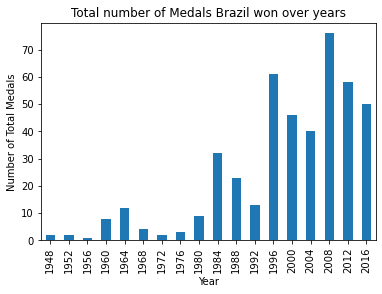

In [28]:
bar_plot = total_medals.plot(kind = "bar", title = "Total number of Medals Brazil won over years")
bar_plot.set_ylabel("Number of Total Medals")
bar_plot

In [2]:
wits.get_countries()

,name,notes,countrycode,isreporter,ispartner,isgroup,grouptype
iso3Code,,,,,,,
AFG,Afghanistan,,004,False,False,No,N/A
ALB,Albania,,008,False,False,No,N/A
DZA,Algeria,,012,False,False,No,N/A
ASM,American Samoa,,016,True,False,No,N/A
AND,Andorra,,020,False,False,No,N/A
...,...,...,...,...,...,...,...
YEM,Yemen,,887,False,False,No,N/A
YDR,Yemen Democratic,,720,True,False,No,N/A
YUG,"Yugoslavia,FR(Serbia/Montenegr",,890,True,False,No,N/A


In [3]:
wits.get_products()

,isgroup,nomenclaturecode,grouptype,productdescription,notes
productcode,,,,,
999999,N/A,N/A,N/A,Not Applicable,
01-05_Animal,Yes,H0,Sector,Animal,
06-15_Vegetable,Yes,H0,Sector,Vegetable,
16-24_FoodProd,Yes,H0,Sector,Food Products,
25-26_Minerals,Yes,H0,Sector,Minerals,
27-27_Fuels,Yes,H0,Sector,Fuels,
28-38_Chemicals,Yes,H0,Sector,Chemicals,
39-40_PlastiRub,Yes,H0,Sector,Plastic or Rubber,
41-43_HidesSkin,Yes,H0,Sector,Hides and Skins,
